In [1]:
import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from datetime import datetime, date

In [2]:
df = pd.read_csv('./data/00_original/Lake_Bilancino.csv', sep=',', header=0, index_col=0)

df.index = pd.to_datetime(df.index, format = '%d/%m/%Y')

# df.index = pd.to_datetime(df.index)
df.head(5)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-06-03,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-04,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-05,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-07,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


<AxesSubplot:>

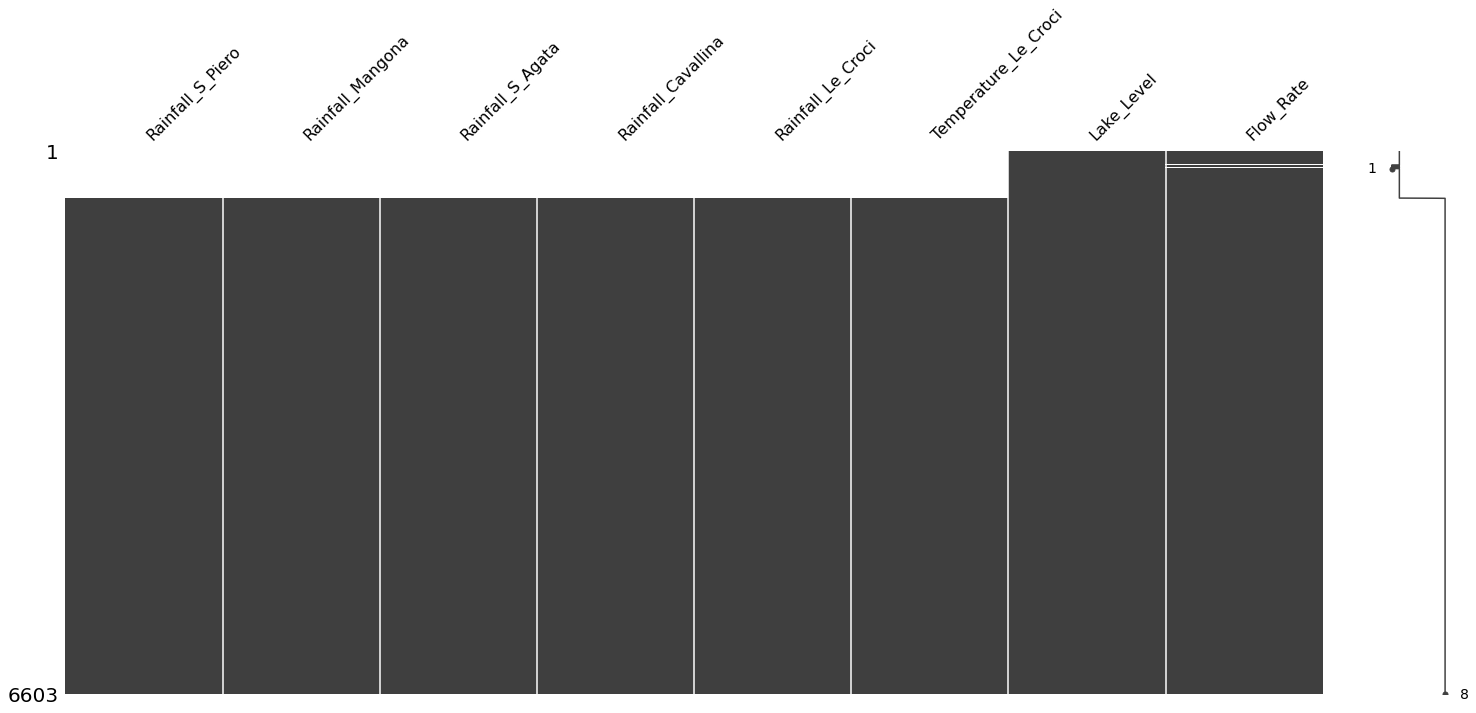

In [3]:
msno.matrix(df)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2004-01-01,0.0,0.0,0.4,0.0,0.0,NaN,251.14,0.5
2004-01-02,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
2004-01-03,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
2004-01-04,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
2004-01-05,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5


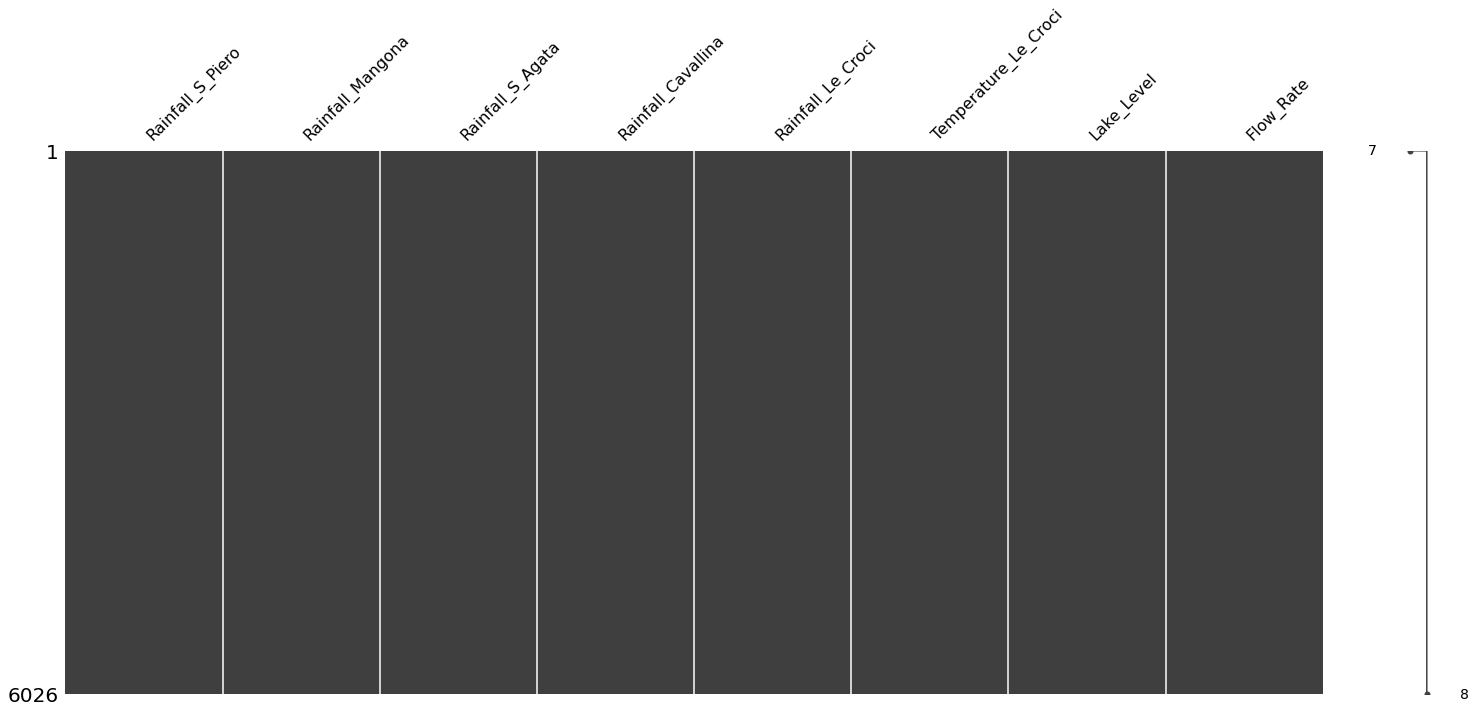

In [4]:
df = df[df.index >= '2004-1-1']
msno.matrix(df)
df.head(5)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Rainfall_S_Piero,1.000000,0.867117,0.897863,0.908543,0.910068,-0.133295,-0.034152,0.142241
Rainfall_Mangona,0.867117,1.000000,0.865833,0.873150,0.863780,-0.134986,-0.032264,0.166216
Rainfall_S_Agata,0.897863,0.865833,1.000000,0.887618,0.880652,-0.124250,-0.032259,0.158884
Rainfall_Cavallina,0.908543,0.873150,0.887618,1.000000,0.922999,-0.128926,-0.033957,0.172795
Rainfall_Le_Croci,0.910068,0.863780,0.880652,0.922999,1.000000,-0.139045,-0.024512,0.187022
Temperature_Le_Croci,-0.133295,-0.134986,-0.124250,-0.128926,-0.139045,1.000000,0.063569,-0.195136
Lake_Level,-0.034152,-0.032264,-0.032259,-0.033957,-0.024512,0.063569,1.000000,0.298746
Flow_Rate,0.142241,0.166216,0.158884,0.172795,0.187022,-0.195136,0.298746,1.000000


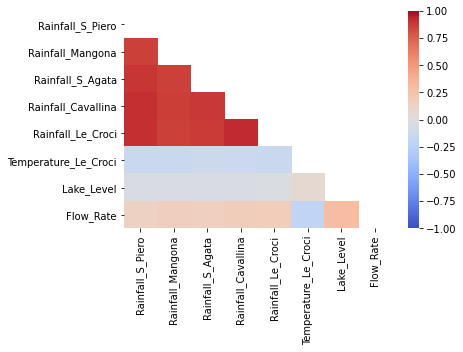

In [5]:
def correlation_matrix(df):
    corr = df.corr(method='pearson')
    sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap='coolwarm')
    return corr

correlation_matrix(df)

In [6]:
# Correlated rainfal are redundant we keep just Cavallina rainfall because it is located next the lake.
df = df.drop(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Le_Croci'], axis=1, errors='ignore')

# Lake_level is givein relative to sea elevation of the lake which 251m and lake depth is on average 31m
# For easier result interpretation we transofrm them to only lake depth
df['Lake_Level'] -= (251 - 31)

array([[<AxesSubplot:title={'center':'Rainfall_Cavallina'}>,
        <AxesSubplot:title={'center':'Temperature_Le_Croci'}>],
       [<AxesSubplot:title={'center':'Lake_Level'}>,
        <AxesSubplot:title={'center':'Flow_Rate'}>]], dtype=object)

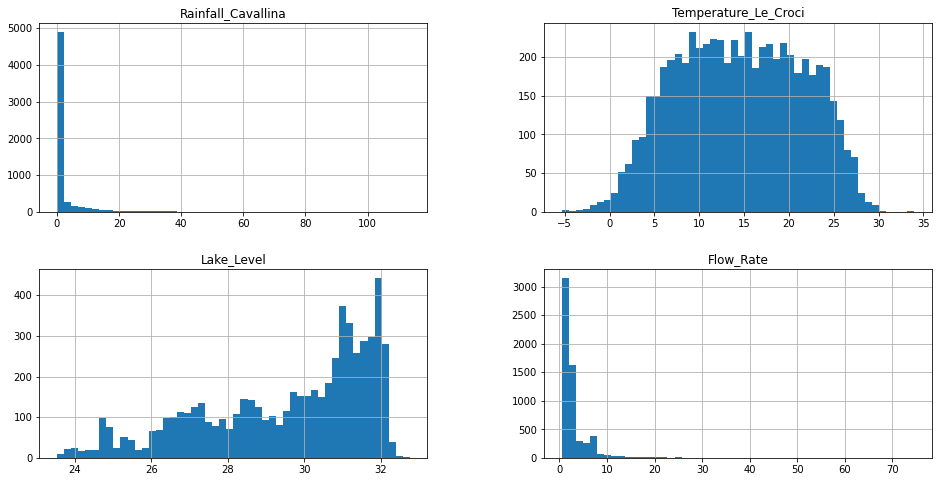

In [7]:
df.hist(figsize=(16, 8), bins=50)

<AxesSubplot:xlabel='Date'>

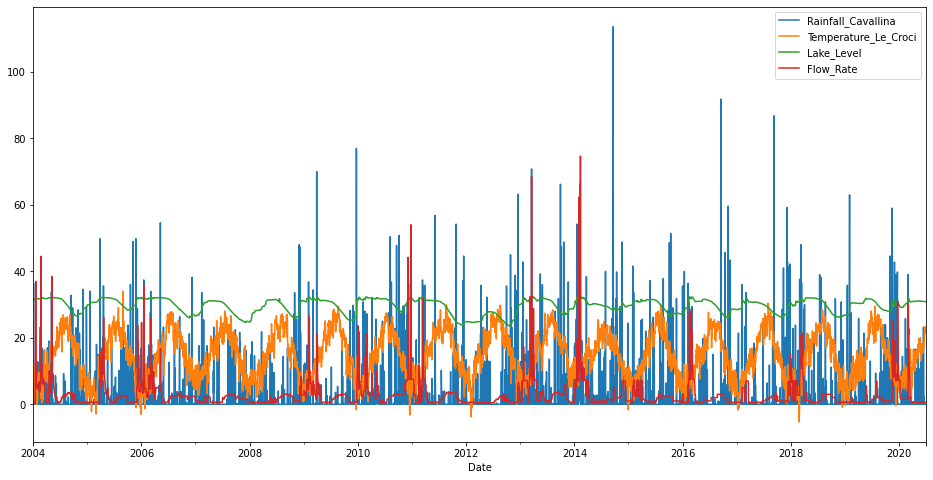

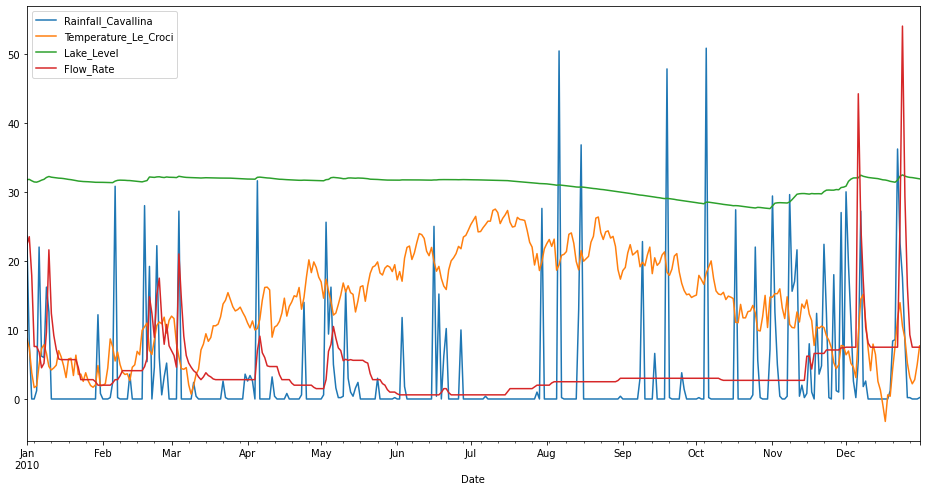

In [8]:
df.plot(figsize=(16, 8))
df[(df.index >= '2010-01-01') & (df.index <= '2010-12-31')].plot(figsize=(16, 8))

0.998873159822806
0.8491392145611524


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

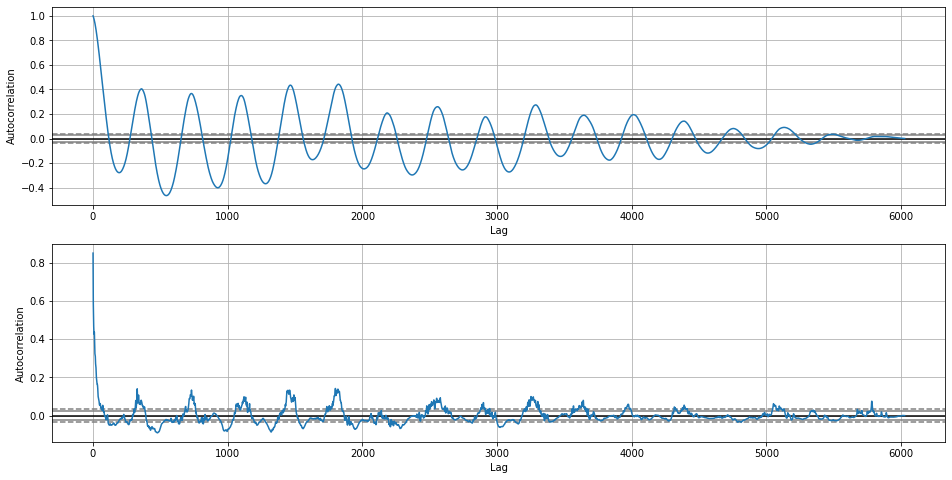

In [9]:
# SEASONALITY CHECK

fig, ax = plt.subplots(2, 1, figsize=(16, 8))

print(df['Lake_Level'].autocorr(lag=1))
print(df['Flow_Rate'].autocorr(lag=1))

pd.plotting.autocorrelation_plot(df['Lake_Level'], ax=ax[0])
pd.plotting.autocorrelation_plot(df['Flow_Rate'], ax=ax[1])

# if autocorrelation plot has sinusuid shape means that we can have case of seasonality

Lake_Level ADF = -5.702960543994172
Lake_Level p-value = 7.601260033789033e-07


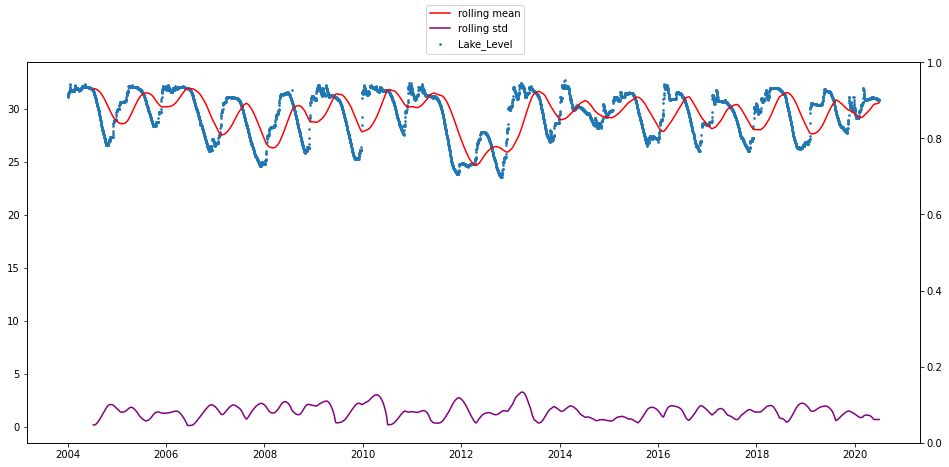

In [41]:
# STATIONARITY
# Stationarity check means that we have constant mean and variance of the data over the time.
# We can inspect visually or use Dickey-Fuller statistical test.

# TODO HERE PLOT LAKE_LEVEL WITH ROLLING AVG AND STD

# Dickey-Fuller statisticall test:
# Is trying to reject the null hypothesis that the data is non-stationary.
# If we reject the test means that data is stationary
#    if p <= 0.05 we reject the null hypothesis and data is stationary
#    if p >  0.05 we accept the null hypothesis and data is non-stationary

adf_test = adfuller(df['Lake_Level']) # Lake_Level is non-stationary

print('Lake_Level ADF = {}'.format(str(adf_test[0])))
print('Lake_Level p-value = {}'.format(str(adf_test[1])))

fig, ax = plt.subplots(1, 1, figsize=(16, 7))

ax.scatter(x=df.index, y=df['Lake_Level'], label='Lake_Level', marker='.', s=10, alpha=1)
ax2 = ax.twinx()
months = 16 * 12
ax.plot(df['Lake_Level'].rolling(months).mean(), color='red', label='rolling mean')
ax.plot(df['Lake_Level'].rolling(months).std(), color='purple', label='rolling std')
ffig.legend(loc='upper center')


In [11]:
# df['month_sin'] = np.sin((pd.to_datetime(df.index).month - 1) * (2. * np.pi / 12))
# df['month_cos'] = np.cos((pd.to_datetime(df.index).month - 1) * (2. * np.pi / 12))

# df.groupby(['month_cos', 'month_sin']).size().reset_index().plot(x='month_cos', y='month_sin', kind='scatter', figsize=(4, 4))

,Rainfall_Cavallina,Temperature_Le_Croci,Lake_Level,Flow_Rate
Rainfall_Cavallina,1.000000,-0.128926,-0.033957,0.172795
Temperature_Le_Croci,-0.128926,1.000000,0.063569,-0.195136
Lake_Level,-0.033957,0.063569,1.000000,0.298746
Flow_Rate,0.172795,-0.195136,0.298746,1.000000


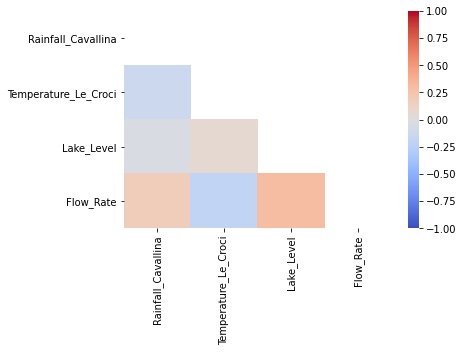

In [12]:
correlation_matrix(df)